In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import collections
import sys
import time

In [2]:
# loading test data
test_data = pd.read_csv("q2/q2test.csv")
test_data["X_0"] = 1
x_test = test_data[["X_0", "X_1", "X_2"]].to_numpy()
y_test = test_data["Y"].to_numpy()
y_test = np.reshape(y_test, (x_test.shape[0], 1))

In [3]:
# Sampling 1 million data points with 
# X0 = 1, X1 ~ N(3, 4), X2 ~ N(-1, 4)
# theta = [3,1,2] and noise (epsilon) ~ N(0, 2)
theta0 = np.array([[3],[1],[2]])
X_0 = np.ones((1000000, 1))
X_1 = np.random.normal(3,2,1000000).reshape(1000000, 1)
X_2 = np.random.normal(-1, 2, 1000000).reshape(1000000, 1)
noise = np.random.normal(0, np.sqrt(2), 1000000).reshape(1000000, 1)
X_data = np.append(X_0, X_1, axis = 1)
X_data = np.append(X_data, X_2, axis = 1)
Y_data = np.dot(X_data, theta0) + noise

# shuffle the data
shuffling = np.append(X_data, Y_data, axis = 1)
np.random.shuffle(shuffling)
X_data = shuffling[:, 0:3]
Y_data = shuffling[:, 3:4]

In [4]:
# helper function
# returns the predicted values given the x values and parameters
def hypothesis(x, theta):
  return np.dot(x, theta)

# helper function
# returns the average mean squared error per data point given the predictions and y values
def average_error(y_pred, y, m):
  return np.sum(np.square(y-y_pred))/(2*m)

In [5]:
def stochastic_gradient_descent(X, Y, learning_rate, stopping_criteria, theta_init, batch_size):
  
  
  # starting timer to track runtime 
  start = time.time()
  
  # initialising parameters
  theta = theta_init
  theta_list = theta
  
  # initialising variables
  J_list = [average_error(np.dot(X[0:batch_size], theta), Y[0:batch_size], batch_size)]
  J_final = 0
  J_init = 0
  del_J = 0
  epoch_J = 0
  epoch = 0
  batch_num = 0
  num_batches = X.shape[0]/batch_size
  epoch_J_list = [average_error(np.dot(X, theta), Y, 1000000)*num_batches]
  
  while(True):
    
    # at the end of every epoch we check if the change in average error 
    # per data point is less than the stopping criteria
    if(batch_num == num_batches):
      epoch = epoch + 1
      del_J = abs(epoch_J - epoch_J_list[-1])
      epoch_J_list.append(epoch_J)
      sys.stdout.write(f"Epoch: {epoch}, epoch_del_J: {del_J/num_batches}   \r")
      sys.stdout.flush()
      if(del_J/(num_batches) <= stopping_criteria):
        break
      else:
        batch_num = 0
        epoch_J = 0
    
    # slicing the data to get the minibatch for current iteration
    k = int(batch_num*batch_size)
    mb_x = X_data[k:k+batch_size]
    mb_y = Y_data[k:k+batch_size]
    
    # updating parameters and variables
    J_init = average_error(np.dot(mb_x, theta), mb_y, batch_size)
    v = np.dot(mb_x.T, np.dot(mb_x, theta) - mb_y)
    theta = theta - (learning_rate*v)/batch_size
    theta_list = np.append(theta_list, theta, axis = 1)
    J_final = average_error(np.dot(mb_x, theta), mb_y, batch_size)
    J_list.append(J_final)
    
    epoch_J = epoch_J + J_final
      
    batch_num = batch_num + 1
    
  end = time.time()
  sys.stdout.write(f"{end-start}                                    \r")
  sys.stdout.flush()
  
  # returns
  # theta : the final parameter vector
  # theta_list : list of parameter vectors after at each iteration
  # J_list : list of values of J(ϑ) at each iteration for the minibatch
  return (theta, theta_list, J_list)

In [6]:
batch_size = 100
learning_rate = 0.001
stopping_criteria = 0.0000001
theta_init = np.zeros((3, 1))
theta, theta_list, J_list = stochastic_gradient_descent(X_data, Y_data, learning_rate, stopping_criteria, theta_init, batch_size)

In [7]:
# calculate the differnce in average error between learned and original hypothesis
e1 = average_error(np.dot(x_test, theta0), y_test, 1000000)
e2 = average_error(np.dot(x_test, theta), y_test, 1000000)
print(abs(e2-e1))

1.1983521616590331e-05


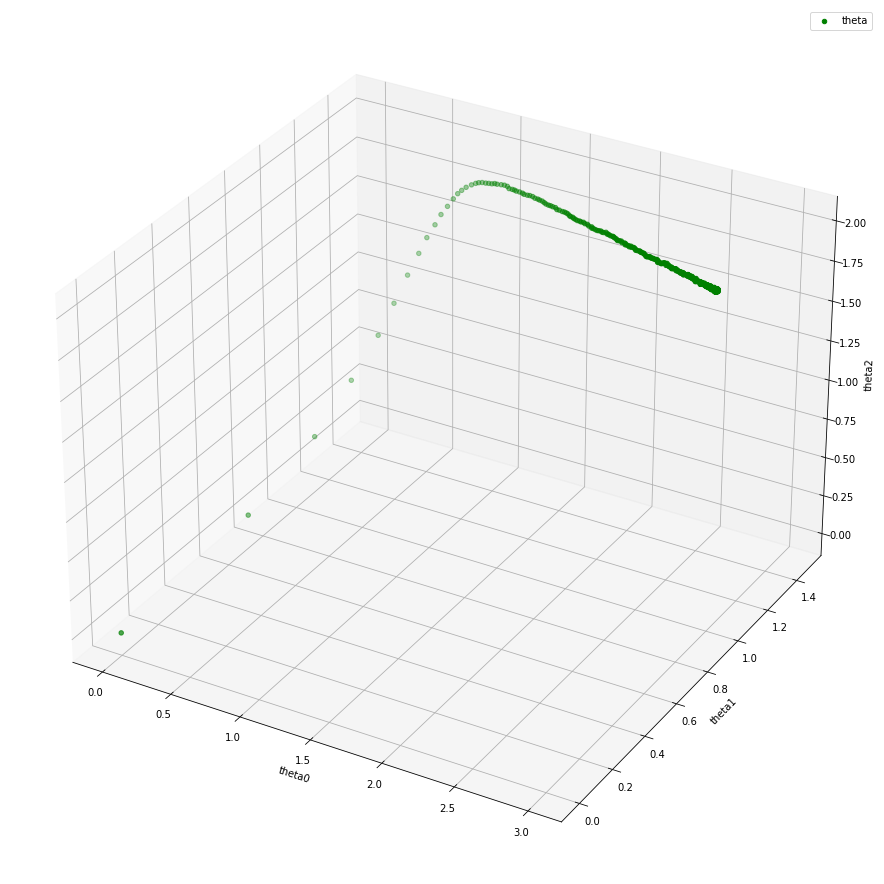

In [8]:
# plotting the movement of ϑ
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = "3d")
ax.scatter3D(theta_list[0][::50], theta_list[1][::50], theta_list[2][::50], color = "green", label = "theta")
plt.legend()
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("theta2")
plt.show()